# Zomato Data Analysis

In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the data from source file
zomato = pd.read_csv("../Zomato Data Analysis\Data\Zomato data .csv")

In [4]:
#Check the data
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
#View the memory usage
zomato.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 42.3 KB


In [6]:
#View the Max and Min values so as to convert the columns to smaller data types
zomato.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
#Check whether null values are present
zomato.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [8]:
#Modify the 'rate' column
zomato['rate'] = zomato['rate'].apply(lambda x : str(x).split('/')[0])

In [9]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
zomato.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [11]:
zomato.nunique()

name                           145
online_order                     2
book_table                       2
rate                            20
votes                           90
approx_cost(for two people)     18
listed_in(type)                  4
dtype: int64

In [12]:
#Convert the columns to appropriate data types
zomato = zomato.astype(
                        {'name':'string',
                        'online_order' : 'category',
                        'book_table':'category',
                        'rate':'float16',
                        'votes' : 'int16',
                        'approx_cost(for two people)':'int16',
                        'listed_in(type)' : 'category'
                        }
                    )

In [13]:
#Check the reduction in memory usage
zomato.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   name                         148 non-null    string  
 1   online_order                 148 non-null    category
 2   book_table                   148 non-null    category
 3   rate                         148 non-null    float16 
 4   votes                        148 non-null    int16   
 5   approx_cost(for two people)  148 non-null    int16   
 6   listed_in(type)              148 non-null    category
dtypes: category(3), float16(1), int16(2), string(1)
memory usage: 11.6 KB


In [14]:
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.101562,775,800,Buffet
1,Spice Elephant,Yes,No,4.101562,787,800,Buffet
2,San Churro Cafe,Yes,No,3.800781,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.699219,88,300,Buffet
4,Grand Village,No,No,3.800781,166,600,Buffet


In [15]:
sns.set_style('darkgrid')

# Explore the categories of restaurants

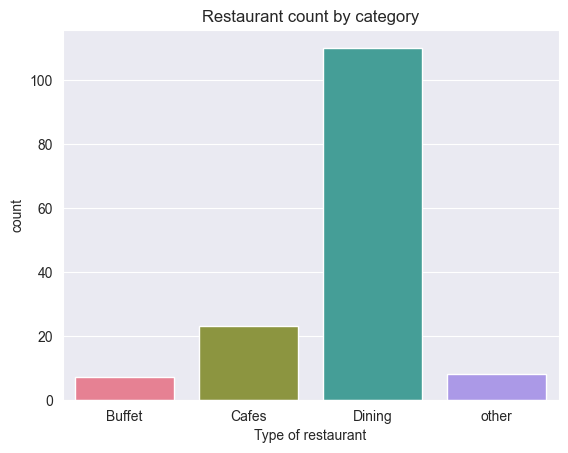

In [16]:
fig,ax = plt.subplots()

sns.countplot(
    data = zomato,
    x = 'listed_in(type)',
    palette='husl'
)

ax.set_xlabel("Type of restaurant")
ax.set_title("Restaurant count by category")
plt.show()

#### Conclusion
* Majority of the restaurants fall into the dining category.

# Explore categories of restaurants based on votes

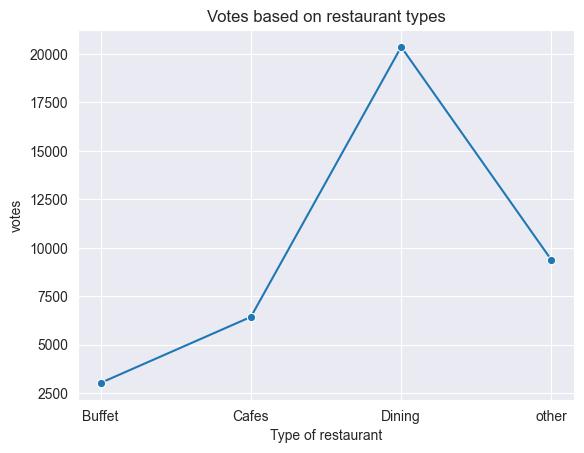

In [17]:
fig,ax = plt.subplots()

sns.lineplot(
    data = zomato,
    x = 'listed_in(type)',
    y = 'votes',
    palette='husl',
    ci = None,
    estimator='sum',
    marker='o',
)

ax.set_xlabel("Type of restaurant")
ax.set_title("Votes based on restaurant types")
plt.show()

#### Conclusion
* Dining restaurants are preferred by a larger number of individuals.

# Top restaurant based on votes

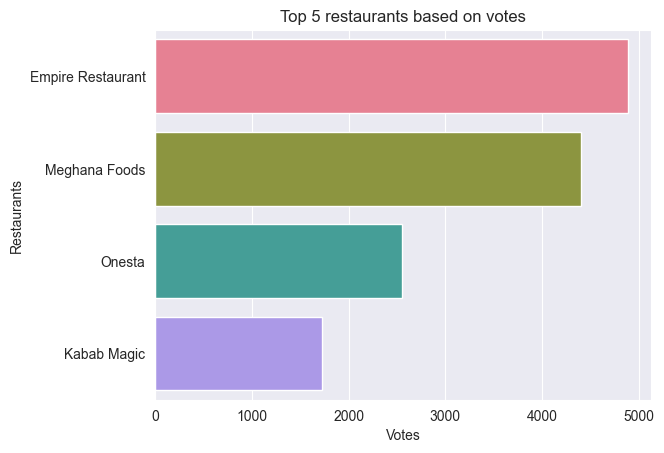

In [18]:
fig,ax = plt.subplots()

top5 = zomato.sort_values(by = ['votes'],ascending = [False]).iloc[:5]

sns.barplot(
    data = top5,
    y = 'name',
    x = 'votes',
    palette='husl'
)

ax.set_ylabel("Restaurants")
ax.set_xlabel("Votes")
ax.set_title("Top 5 restaurants based on votes")

plt.show()

#### Conclusion
* Restaurant with maximum votes : Empire Restaurant 

# Online Vs Offline 

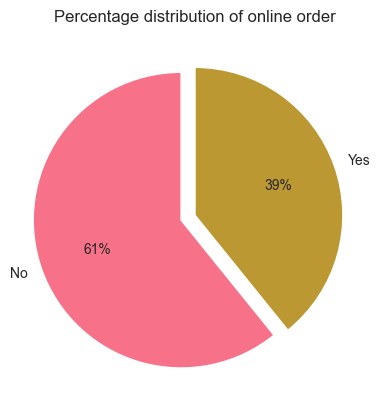

In [19]:
fig,ax = plt.subplots()

ax.pie(
    x =  zomato['online_order'].value_counts(),
    startangle=90,
    labels = zomato['online_order'].value_counts().index,
    autopct = '%.0f%%',
    explode = [0.1,0],
    colors = sns.color_palette('husl')
)

ax.set_title("Percentage distribution of online order")

plt.show()

#### Conclusion
* This suggests that a majority of the restaurants do not accept online orders.

# Ratings Distribution

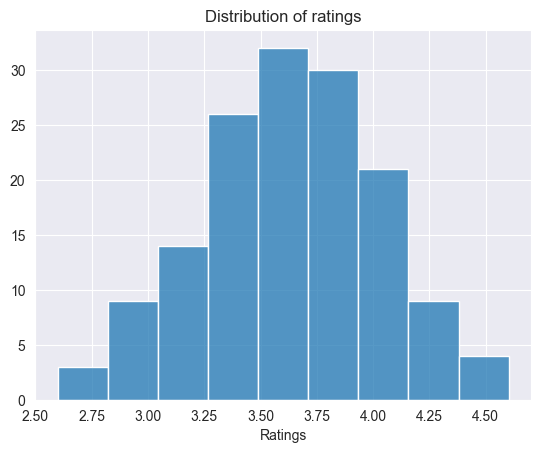

In [20]:
fig,ax = plt.subplots()

sns.histplot(
    x = 'rate',
    data = zomato,
)

ax.set_title("Distribution of ratings")
ax.set_xlabel("Ratings")
ax.set_ylabel("")

plt.show()

#### Conclusion
* The majority of restaurants received ratings ranging from 3.5 to 3.75.

# Explore Approximate cost for 2 people

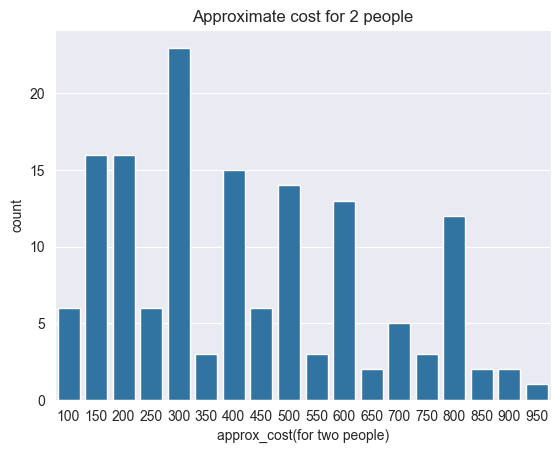

In [21]:
fig,ax = plt.subplots()

sns.countplot(
    x = 'approx_cost(for two people)',
    data = zomato,
)

ax.set_title("Approximate cost for 2 people")

plt.show()

#### Conclusion
* The majority of couples prefer restaurants with an approximate cost of 300 rupees.

# Online Vs Offline based on ratings

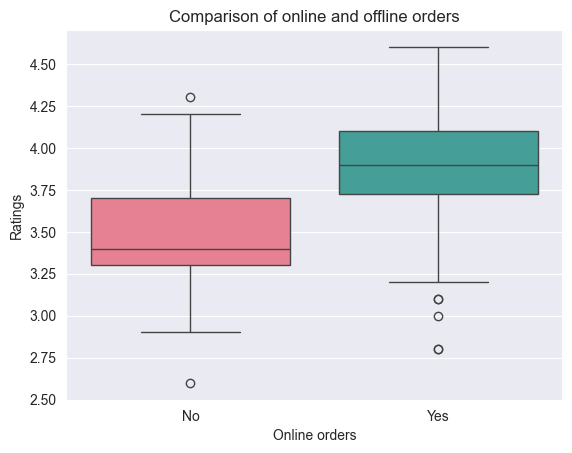

In [22]:
fig,ax = plt.subplots()

sns.boxplot(
    x = 'online_order',
    y = 'rate',
    data = zomato,
    palette = 'husl'
)

ax.set_title("Comparison of online and offline orders")
ax.set_xlabel("Online orders")
ax.set_ylabel("Ratings")

plt.show()

#### Conclusion
* Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

# Online VS Offline based on restaurant types

In [23]:
zomato_pivot = zomato.pivot_table(
                                index = 'listed_in(type)',
                                columns = 'online_order',
                                aggfunc = 'size',
                                fill_value = 0
                            )

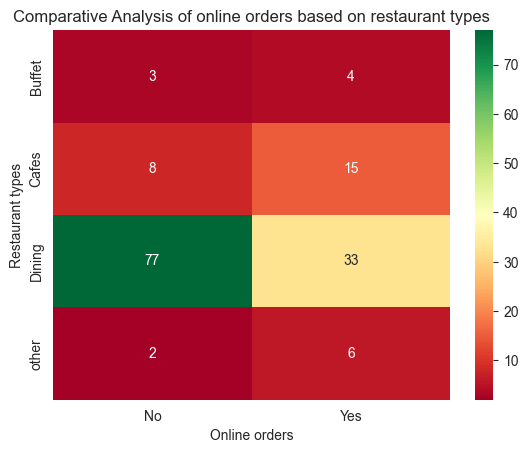

In [24]:
fig,ax = plt.subplots()

sns.heatmap(
    zomato_pivot,
    cmap = 'RdYlGn',
    annot = True
)

ax.set_title("Comparative Analysis of online orders based on restaurant types")
ax.set_xlabel("Online orders")
ax.set_ylabel("Restaurant types")

plt.show()

#### Conclusion
* Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. 
* This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.